# COGS 108 - Final Project 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

* [  ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Aaron Chen
- Ian Rebmann
- Sandra Villamar
- Cathleen Pena


# Group Members IDs

- A15490376
- A16102000
- A14356262
- A15112037

# Research Question

Has the air quality—in particular, the level of CO, NO2, O3, or pm2.5—changed in Los Angeles County since the COVID-19 lockdown regulations were in place? How did it change? Can we conclude that the COVID-19 lockdown is a reasonable guess for this change? Or are there other factors such as weather that may have contributed to a change in the air pollution?

# Background and Prior Work

Our group decided to choose a question related to COVID-19 because we felt that this pandemic is by far the most prevalent factor that has significantly changed our daily lives in the past weeks. In addition, we wanted to incorporate our other interest with environment-related topics. Therefore, we discussed in what ways the COVID-19 lockdown has affected our normal activities and noticed that the lockdown could have an impact on the level of air pollution. We wanted to see if there is a change in air pollution and if so, how significant this change is. We specifically chose Los Angeles County because we wanted to choose an area in California that is known to have bad air pollution as well as an area with a big population, since our findings could then be relevant to a greater audience. 

This question is important to ask because if the lockdown has indeed contributed to an improvement in air pollution, then LA County (as well as other counties) could continue to restrict certain activities that are possible in a remote setting. On the other hand, if the lockdown has not contributed to a significant change in air pollution, then we will know to focus on other possible sources in search for finding a solution for better air quality. 

While searching for our topic, we came across a data science project that studied the change in air pollution in Lombardy, Italy, comparing current COVID-19 lockdown dates to previous years. This project can be found in the first reference link. The data scientists explored air quality data from NO2, Benzene, SO2, pm2.5, and pm10, across the years 2018, 2019, and 2020. They discovered a significant drop in some pollutants and no change in others. They also looked at other factors that are known to improve air quality such as wind, temperature, and precipitation, to see how they changed in relation to the decrease of some pollutant levels. After this analysis, they concluded that the intensity of human activity is the only factor that significantly changed throughout the years and is hence a reasonable guess to why the air quality improved in Lombardy, Italy.  Another study posted to “World Economic Forum” found that some of the world's most polluted cities have seen a large increase in air quality. They plot levels of pm2.5 and post satellite images taken before and during the COVID-19 lockdown to demonstrate how drastic our footprint is on the atmosphere.

**References:**
- 1) https://towardsdatascience.com/is-covid-19-lockdown-cleaning-the-skies-over-milan-42dbba1ec812
- 2) https://www.weforum.org/agenda/2020/04/coronavirus-covid19-air-pollution-enviroment-nature-lockdown

# Hypothesis

We hypothesize that all four pollutants have significantly reduced in level in Los Angeles County due to the COVID-19 lockdown. We believe this because activities such as transportation and manufacturing have notably decreased due to the restrictions of the lockdown. These are all known sources that contribute to air pollution.

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import scipy as sp
from scipy.interpolate import spline

# Data Cleaning

### Load  and Clean First Datasets:

In [2]:
dfw = pd.read_csv("Los_Angeles_Downtown_Weather.csv")
dfaqi = pd.read_csv("Los_Angeles_North_Main_Street_Air_Quality.csv")
display(dfw.head(3))
display(dfaqi.head(3))

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",1/1/2018,0.22,0.0,71,47
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",1/2/2018,0.67,0.0,78,52
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",1/3/2018,0.22,0.0,74,53


,date,pm25,pm10,o3,no2,so2,co
0,5/2/2020,55,29,34,9,,2
1,5/3/2020,48,22,27,6,1,2
2,5/4/2020,37,34,39,12,1,3


##### Fix and Drop Unnecessary Columns:

In [3]:
dfw = dfw.drop(columns=['NAME','STATION'])
dfw.columns = ['date', 'average wind speed', 'precipitation', 'max temp', 'min temp']
dfaqi.columns = ['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
dfaqi = dfaqi.drop(columns=['pm10', 'so2'])

##### Filter Data to 2018 until 2020:

In [4]:
dfw['date'] = pd.to_datetime(dfw['date'], errors='coerce')
dfaqi['date'] = pd.to_datetime(dfaqi['date'], errors='coerce')

dfw = dfw.sort_values(by='date').reset_index(drop=True).drop_duplicates()
dfaqi = dfaqi.sort_values(by='date').reset_index(drop=True).drop_duplicates()

dfaqi = dfaqi[dfaqi['date'].dt.year >= 2018]
              
#drop last date: 2020-05-09 since 3/4 pollutants are missing values for this day
#dfaqi = dfaqi.drop(pd.to_datetime('2020-05-09'))
dfaqi = dfaqi.drop(dfaqi.tail(1).index)
dfaqi.tail()

,date,pm25,o3,no2,co
2305,2020-05-04,37,39,12,3
2306,2020-05-05,56,47,17,4
2307,2020-05-06,57,52,21,4
2308,2020-05-07,55,64,20,4
2309,2020-05-08,59,25,25,6


##### Check Missing Entries:

In [5]:
dfaqi[(dfaqi['pm25'] == ' ')]

,date,pm25,o3,no2,co
1817,2019-01-01,,25,20,6
2080,2019-09-21,,53,17,5
2081,2019-09-22,,50,18,6
2082,2019-09-23,,37,16,4
2083,2019-09-24,,30,20,6
2084,2019-09-25,,38,16,3
2181,2020-01-01,,25,19,5
2276,2020-04-05,,21,2,1
2277,2020-04-06,,27,5,1
2278,2020-04-07,,23,9,2


In [6]:
dfaqi[(dfaqi['o3'] == ' ')]

,date,pm25,o3,no2,co
1516,2018-03-06,31,,26,12
1816,2018-12-31,53,,,
2180,2019-12-30,56,,,


In [7]:
dfaqi[(dfaqi['no2'] == ' ')]

,date,pm25,o3,no2,co
1816,2018-12-31,53,,,
2180,2019-12-30,56,,,


In [8]:
dfaqi[(dfaqi['co'] == ' ')]

,date,pm25,o3,no2,co
1816,2018-12-31,53,,,
2164,2019-12-14,85,9,21,
2165,2019-12-15,79,29,11,
2166,2019-12-16,25,20,26,
2167,2019-12-17,31,22,26,
2170,2019-12-20,55,18,29,
2180,2019-12-30,56,,,


##### Fix Missing Entries:

In [9]:
#since the entries are missing at random, we decide to replace by 0
dfaqi = dfaqi.replace(' ', '0')

##### Check  and Fix Data Types:

In [10]:
print(dfw.dtypes)
print()
print(dfaqi.dtypes)

date                  datetime64[ns]
average wind speed           float64
precipitation                float64
max temp                       int64
min temp                       int64
dtype: object

date    datetime64[ns]
pm25            object
o3              object
no2             object
co              object
dtype: object


In [11]:
dfaqi = dfaqi.astype({'pm25': 'int32', 'o3': 'int32', 'no2': 'int32', 'co': 'int32'})

In [12]:
print(dfw.dtypes)
print()
print(dfaqi.dtypes)

date                  datetime64[ns]
average wind speed           float64
precipitation                float64
max temp                       int64
min temp                       int64
dtype: object

date    datetime64[ns]
pm25             int32
o3               int32
no2              int32
co               int32
dtype: object


##### Separate Data by Years:

In [13]:
dfw2018=dfw[dfw['date'].dt.year == 2018].sort_values(by='date').reset_index(drop=True)
dfw2019=dfw[dfw['date'].dt.year == 2019].sort_values(by='date').reset_index(drop=True)
dfw2020=dfw[dfw['date'].dt.year == 2020].sort_values(by='date').reset_index(drop=True)

In [14]:
dfaqi2018=dfaqi[dfaqi['date'].dt.year == 2018].sort_values(by='date').reset_index(drop=True)
dfaqi2019=dfaqi[dfaqi['date'].dt.year == 2019].sort_values(by='date').reset_index(drop=True)
dfaqi2020=dfaqi[dfaqi['date'].dt.year == 2020].sort_values(by='date').reset_index(drop=True)

### Load and Clean Second Datasets:

In [15]:
data_2018 = pd.read_csv('2018LosAngelesH1Data.csv')
data_2020 = pd.read_csv('2020LosAngelesDataset.csv')

Q1_2019 = pd.read_csv('2019Q1LosAngelesDataset.csv')
Q2_2019 = pd.read_csv('Q2LosAngelesDataset.csv')
Q3_2019 = pd.read_csv('Q3LosAngelesDataset.csv')
Q4_2019 = pd.read_csv('Q4LosAngelesDataset.csv')

data_2019 = pd.concat([Q1_2019, Q2_2019, Q3_2019, Q4_2019])
data_2019.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2019-03-26,US,Los Angeles,co,24,2.2,10.6,5.3,62.80
1,2018-12-31,US,Los Angeles,co,20,3.5,11.2,7.3,80.10
2,2019-03-19,US,Los Angeles,co,23,1.7,11.3,3.6,122.33
3,2019-03-24,US,Los Angeles,co,24,2.2,5.9,2.8,17.06
4,2019-02-02,US,Los Angeles,co,24,1.6,4.3,2.2,6.35


In [16]:
assert len(Q1_2019) + len(Q2_2019) + len(Q3_2019) + len(Q4_2019) == len(data_2019)

##### check and fix types for the columns:

In [17]:
data_2019.dtypes

Date         object
Country      object
City         object
Specie       object
count         int64
min         float64
max         float64
median      float64
variance    float64
dtype: object

In [18]:
data_2018['Date'] = pd.to_datetime(data_2018['Date'])
data_2019['Date'] = pd.to_datetime(data_2019['Date'])
data_2020['Date'] = pd.to_datetime(data_2020['Date'])
data_2018 = data_2018.sort_values(by='Date').reset_index(drop=True)
data_2019 = data_2019.sort_values(by='Date').reset_index(drop=True)
data_2020 = data_2020.sort_values(by='Date').reset_index(drop=True)
data_2019.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2018-12-31,US,Los Angeles,wind-speed,60,0.0,0.0,0.0,0.00
1,2018-12-31,US,Los Angeles,wind-gust,60,0.1,7.0,3.0,23.38
2,2018-12-31,US,Los Angeles,humidity,60,0.0,0.0,0.0,0.00
3,2018-12-31,US,Los Angeles,pm10,64,11.0,72.0,25.0,1208.63
4,2018-12-31,US,Los Angeles,o3,15,0.8,27.2,24.1,1303.62


In [19]:
#data_2018.head() #starts 01/01/18, ends 07/01/18
#data_2019.tail() #starts 12/31/18, ends 01/05/20
#data_2020.tail() #starts 12/30/20, ends 04/20/20

In [20]:
data_2019.dtypes

Date        datetime64[ns]
Country             object
City                object
Specie              object
count                int64
min                float64
max                float64
median             float64
variance           float64
dtype: object

##### Fix values in the column so that they are homogeneous:
'wind-speed' and 'wind speed' is the same and so are 'wind-gust' and 'wind gust'

In [21]:
data_2019['Specie'].unique()

array(['wind-speed', 'wind-gust', 'humidity', 'pm10', 'o3', 'dew', 'no2',
       'pressure', 'temperature', 'co', 'pm25', 'so2', 'wind speed',
       'wind gust'], dtype=object)

In [22]:
data_2018 = data_2018.replace({'wind-speed':'wind speed', 'wind-gust':'wind gust'})
data_2019 = data_2019.replace({'wind-speed':'wind speed', 'wind-gust':'wind gust'})
data_2020 = data_2020.replace({'wind-speed':'wind speed', 'wind-gust':'wind gust'})
data_2020['Specie'].unique()

array(['no2', 'o3', 'co', 'pm10', 'pm25', 'humidity', 'pressure',
       'temperature', 'wind gust', 'wind speed', 'so2', 'dew'],
      dtype=object)

##### Combine data from all years:
Drop any duplicate rows and sort on 'Date'.

In [23]:
data = pd.concat([data_2018, data_2019, data_2020])
data = data.sort_values(by='Date').reset_index(drop=True).drop_duplicates()
data.head(10)

,Date,Country,City,Specie,count,min,max,median,variance
0,2018-01-01,US,Los Angeles,no2,48,10.2,38.9,25.1,421.71
1,2018-01-01,US,Los Angeles,so2,3,1.5,1.5,1.5,0.00
2,2018-01-01,US,Los Angeles,o3,19,0.8,36.8,17.6,1974.41
3,2018-01-01,US,Los Angeles,co,24,3.4,43.4,13.6,901.89
4,2018-01-01,US,Los Angeles,pm25,68,30.0,309.0,162.0,34853.00
5,2018-01-01,US,Los Angeles,pm10,24,37.0,90.0,62.0,1759.55
6,2018-01-02,US,Los Angeles,pm10,24,51.0,78.0,61.0,486.50
7,2018-01-02,US,Los Angeles,co,24,7.7,48.9,17.8,1835.46
8,2018-01-02,US,Los Angeles,pm25,72,53.0,177.0,127.0,10782.90
9,2018-01-02,US,Los Angeles,no2,48,22.3,66.4,38.0,1184.92


#### Create new data frame using only specie and count, group them by date and get the counts of each specie:
##### Group by specie and create its' own data frame of the date and count

In [24]:
species = list(data.Specie.unique())
dfs = []
for specie in species:
    df = data[data['Specie'] == specie][['Date', 'count']]
    dfs.append(df)

In [25]:
no2, so2, o3, co, pm25, pm10, temperature, humidity, wind_speed, pressure, wind_gust, dew = dfs[0], dfs[1], dfs[2], dfs[3], dfs[4], dfs[5], dfs[6], dfs[7], dfs[8], dfs[9], dfs[10], dfs[11]

##### Rename columns so that when we merge them, the names are specific and not all 'count'

In [26]:
no2 = no2.rename(columns={"count": "no2_count"}) 
so2 = so2.rename(columns={"count": "so2_count"})
o3 = o3.rename(columns={"count": "o3_count"})
co = co.rename(columns={"count": "co_count"})
pm25 = pm25.rename(columns={"count": "pm25_count"})
pm10 = pm10.rename(columns={"count": "pm10_count"})
temperature = temperature.rename(columns={"count": "temperature_count"})
humidity = humidity.rename(columns={"count": "humidity_count"})
wind_speed = wind_speed.rename(columns={"count": "wind_speed_count"})
pressure = pressure.rename(columns={"count": "pressure_count"})
wind_gust = wind_gust.rename(columns={"count": "wind_gust_count"})
dew = dew.rename(columns={"count": "dew_count"})

##### Merge all dataframes together

In [27]:
data2 = pd.merge(no2, so2, how='outer', on='Date')
data2 = pd.merge(data2, o3, how='outer', on='Date')
data2 = pd.merge(data2, co, how='outer', on='Date')
data2 = pd.merge(data2, pm25, how='outer', on='Date')
data2 = pd.merge(data2, pm10, how='outer', on='Date')
data2 = pd.merge(data2, temperature, how='outer', on='Date')
data2 = pd.merge(data2, humidity, how='outer', on='Date')
data2 = pd.merge(data2, wind_speed, how='outer', on='Date')
data2 = pd.merge(data2, pressure, how='outer', on='Date')
data2 = pd.merge(data2, wind_gust, how='outer', on='Date')
data2 = pd.merge(data2, dew, how='outer', on='Date')
data2.head()

,Date,no2_count,so2_count,o3_count,co_count,pm25_count,pm10_count,temperature_count,humidity_count,wind_speed_count,pressure_count,wind_gust_count,dew_count
0,2018-01-01,48,3.0,19.0,24.0,68,24.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,48,NaN,21.0,24.0,72,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,48,NaN,21.0,24.0,72,24.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-04,47,4.0,21.0,24.0,72,24.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-05,48,NaN,20.0,24.0,70,24.0,NaN,NaN,NaN,NaN,NaN,NaN


# Data Analysis & Results

### Boxplots of Pollution Levels through 2018, 2019, and 2020

These boxplots display the AQI levels of each pollutant. We will use the same timeframe of the first phase lockdown dates of 2020 (March 19th to May 8th), throughout 2018 and 2019 as well. This way, we can compare the air quality during the lockdown in 2020 to previous years' air quality.

#### Boxplot for pm2.5

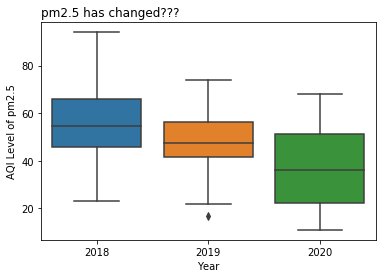

In [28]:
#only use dates from March 19 to May 8
lockdown_dates_2018 = (dfaqi['date'] >= '2018-3-19') & (dfaqi['date'] <= '2018-5-8')
lockdown_dates_2019 = (dfaqi['date'] >= '2019-3-19') & (dfaqi['date'] <= '2019-5-8')
lockdown_dates_2020 = (dfaqi['date'] >= '2020-3-19') & (dfaqi['date'] <= '2020-5-8')

#create dataframe for pm25 during lockdown dates
df_pm25_lockdown = dfaqi.loc[:,['date', 'pm25']]
df_pm25_lockdown = df_pm25_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]
#drop rows from each year if at least one year has a missing value
pm25_dates_missing = ['2018-04-05', '2018-04-06', '2018-04-07', '2019-04-05', '2019-04-06', '2019-04-07',
                     '2020-04-05', '2020-04-06', '2020-04-07']
df_pm25_lockdown = df_pm25_lockdown[~df_pm25_lockdown['date'] .isin(pm25_dates_missing)]
#add year column
df_pm25_lockdown['year'] = df_pm25_lockdown['date'].dt.year

#set up color palette
years = df_pm25_lockdown['year'].unique()
palette = dict(zip(years, sns.color_palette()))

#generate boxplots
ax = sns.boxplot(x='year', y='pm25', data=df_pm25_lockdown, palette=palette)
ax.set_title('pm2.5 has changed???', loc='left')
ax.set_ylabel('AQI Level of pm2.5')
ax.set_xlabel('Year');


#### Boxplot for O3

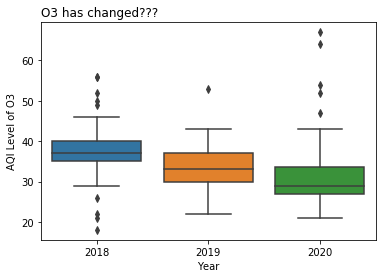

In [29]:
#create dataframe for o3 during lockdown dates
df_o3_lockdown = dfaqi.loc[:,['date', 'o3']]
df_o3_lockdown = df_o3_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]
#no rows with missing data from any year: check!
#add year column
df_o3_lockdown['year'] = df_o3_lockdown['date'].dt.year

#generate boxplots
ax = sns.boxplot(x='year', y='o3', data=df_o3_lockdown, palette=palette)
ax.set_title('O3 has changed???', loc='left')
ax.set_ylabel('AQI Level of O3')
ax.set_xlabel('Year');

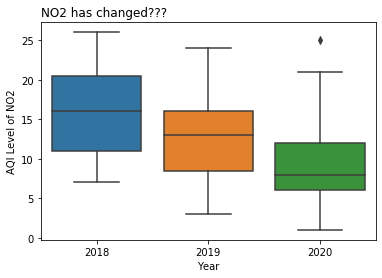

In [30]:
#create dataframe for no2 during lockdown dates
df_no2_lockdown = dfaqi.loc[:,['date', 'no2']]
df_no2_lockdown = df_no2_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]
#no rows with missing data from any year: check!
#add year column
df_no2_lockdown['year'] = df_no2_lockdown['date'].dt.year

#generate boxplots
ax = sns.boxplot(x='year', y='no2', data=df_no2_lockdown, palette=palette)
ax.set_title('NO2 has changed???', loc='left')
ax.set_ylabel('AQI Level of NO2')
ax.set_xlabel('Year');

#### Boxplot for CO

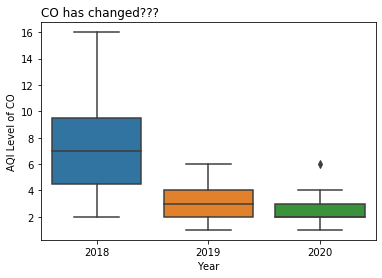

In [31]:
#create dataframe for co during lockdown dates
df_co_lockdown = dfaqi.loc[:,['date', 'co']]
df_co_lockdown = df_co_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]
#no rows with missing data from any year: check!
#add year column
df_co_lockdown['year'] = df_co_lockdown['date'].dt.year

#generate boxplots
ax = sns.boxplot(x='year', y='co', data=df_co_lockdown, palette=palette)
ax.set_title('CO has changed???', loc='left')
ax.set_ylabel('AQI Level of CO')
ax.set_xlabel('Year');

### Correlation heatmaps of measures:

In [32]:
data2.corr()

,no2_count,so2_count,o3_count,co_count,pm25_count,pm10_count,temperature_count,humidity_count,wind_speed_count,pressure_count,wind_gust_count,dew_count
no2_count,1.000000,0.241592,0.312999,0.572573,0.416887,0.170415,0.356648,0.441377,0.112410,0.345189,0.099798,0.131723
so2_count,0.241592,1.000000,0.197872,0.436737,-0.061190,-0.110938,-0.092296,-0.129918,-0.087926,-0.125249,-0.125035,0.109989
o3_count,0.312999,0.197872,1.000000,0.490907,0.174042,0.189599,0.217634,0.290489,0.290627,0.226205,0.256962,-0.091814
co_count,0.572573,0.436737,0.490907,1.000000,0.378589,0.093573,0.389305,0.362337,0.218559,0.302663,0.137061,0.019761
pm25_count,0.416887,-0.061190,0.174042,0.378589,1.000000,0.251620,0.287850,0.381133,0.140289,0.281772,0.234076,0.035051
pm10_count,0.170415,-0.110938,0.189599,0.093573,0.251620,1.000000,0.048986,0.199219,0.254380,0.176731,0.406199,-0.118973
temperature_count,0.356648,-0.092296,0.217634,0.389305,0.287850,0.048986,1.000000,0.675689,0.680486,0.564878,0.237521,0.060722
humidity_count,0.441377,-0.129918,0.290489,0.362337,0.381133,0.199219,0.675689,1.000000,0.412318,0.850366,0.441547,0.051335
wind_speed_count,0.112410,-0.087926,0.290627,0.218559,0.140289,0.254380,0.680486,0.412318,1.000000,0.443045,0.576802,-0.122710
pressure_count,0.345189,-0.125249,0.226205,0.302663,0.281772,0.176731,0.564878,0.850366,0.443045,1.000000,0.533535,0.063600


In [33]:
dfw.corr()

,average wind speed,precipitation,max temp,min temp
average wind speed,1.000000,0.395229,-0.290949,-0.028904
precipitation,0.395229,1.000000,-0.302606,-0.129266
max temp,-0.290949,-0.302606,1.000000,0.740979
min temp,-0.028904,-0.129266,0.740979,1.000000


In [34]:
dfaqi.corr()

,pm25,o3,no2,co
pm25,1.000000,0.208443,0.159160,0.331157
o3,0.208443,1.000000,-0.264063,-0.149338
no2,0.159160,-0.264063,1.000000,0.702398
co,0.331157,-0.149338,0.702398,1.000000


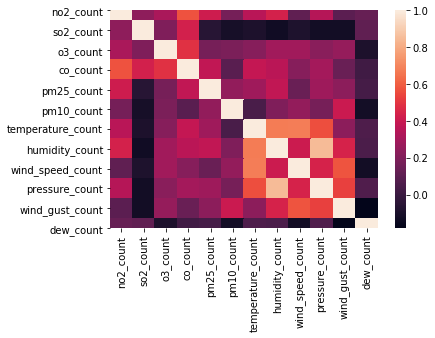

In [35]:
correlation_heatmap_1 = sns.heatmap(data2.corr(), annot=False)
correlation_heatmap_1

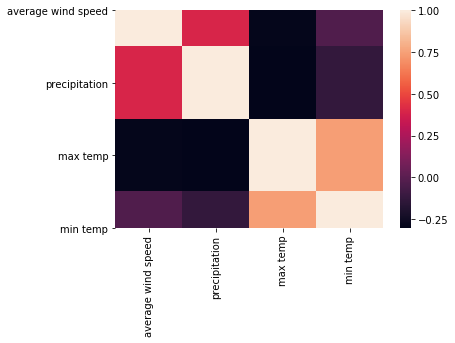

In [36]:
correlation_heatmap_2 = sns.heatmap(dfw.corr(), annot=False)
correlation_heatmap_2

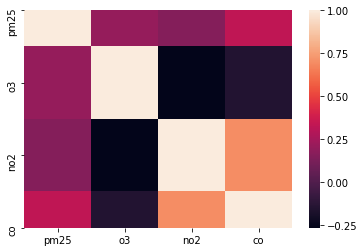

In [37]:
correlation_heatmap_3 = sns.heatmap(dfaqi.corr(), annot=False)
correlation_heatmap_3

#### Permutation Test for PM 2.5:

In [38]:
lockdown = pd.to_datetime("2020-03-19")
dfaqi2 = dfaqi
dfaqi2['lockdown'] = dfaqi['date']>= lockdown
dfaqi2 = dfaqi2.reset_index(drop=True)
dfaqi2.head(3)

,date,pm25,o3,no2,co,lockdown
0,2018-01-01,133,31,25,14,False
1,2018-01-02,148,19,39,24,False
2,2018-01-03,133,4,41,17,False


In [39]:
pm25_and_lockdown = dfaqi2[['pm25', 'lockdown']]

obs_diff = (pm25_and_lockdown.groupby('lockdown')['pm25'].mean().diff().iloc[-1])
obs_diff

-16.030687367883957

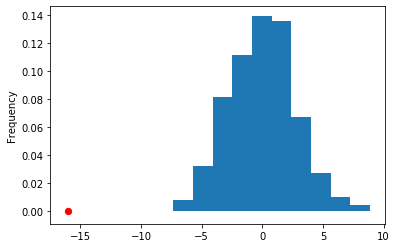

In [40]:
n_repititions = 1000
differences = []

for _ in range(n_repititions):
    shuffled_pm25 = (
    pm25_and_lockdown['pm25']
    .sample(replace=False, frac=1)
    .reset_index(drop=True)
    )
    
    original_and_shuffled = (pm25_and_lockdown.assign(**{'shuffled_pm25': shuffled_pm25}))
    group_means = (original_and_shuffled.groupby('lockdown').mean().loc[:, 'shuffled_pm25'])
    difference = group_means.diff().iloc[-1]
    differences.append(difference)
    
pd.Series(differences).plot(kind='hist', density=True)
plt.scatter(obs_diff, 0, color='red', s=40)

In [41]:
pval = np.count_nonzero(differences<= obs_diff) / n_repititions
pval

0.0

In [42]:
from scipy.stats import ks_2samp
gp1 = pm25_and_lockdown.loc[pm25_and_lockdown.lockdown==True, 'pm25']
gp2 = pm25_and_lockdown.loc[pm25_and_lockdown.lockdown==False, 'pm25']
ks_2samp(gp1, gp2)

Ks_2sampResult(statistic=0.33573875646913043, pvalue=2.6208659097631325e-05)

#### Permutation Test for $O_3$:

In [43]:
o3_and_lockdown = dfaqi2[['o3', 'lockdown']]

obs_diff = (o3_and_lockdown.groupby('lockdown')['o3'].mean().diff().iloc[-1])
obs_diff

1.396530359355637

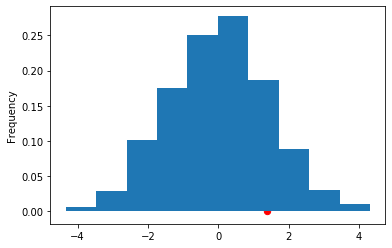

In [44]:
n_repititions = 1000
differences = []

for _ in range(n_repititions):
    shuffled_o3 = (
    o3_and_lockdown['o3']
    .sample(replace=False, frac=1)
    .reset_index(drop=True)
    )
    
    original_and_shuffled = (o3_and_lockdown.assign(**{'shuffled_o3': shuffled_o3}))
    group_means = (original_and_shuffled.groupby('lockdown').mean().loc[:, 'shuffled_o3'])
    difference = group_means.diff().iloc[-1]
    differences.append(difference)
    
pd.Series(differences).plot(kind='hist', density=True)
plt.scatter(obs_diff, 0, color='red', s=40)

In [45]:
pval = np.count_nonzero(differences<= obs_diff) / n_repititions
pval

0.844

In [46]:
gp1 = o3_and_lockdown.loc[o3_and_lockdown.lockdown==True, 'o3']
gp2 = o3_and_lockdown.loc[o3_and_lockdown.lockdown==False, 'o3']
ks_2samp(gp1, gp2)

Ks_2sampResult(statistic=0.16786937823456516, pvalue=0.1203065012813612)

#### Permutation Test for $NO_2$:

In [47]:
no2_and_lockdown = dfaqi2[['no2', 'lockdown']]

obs_diff = (no2_and_lockdown.groupby('lockdown')['no2'].mean().diff().iloc[-1])
obs_diff

-7.253371236970624

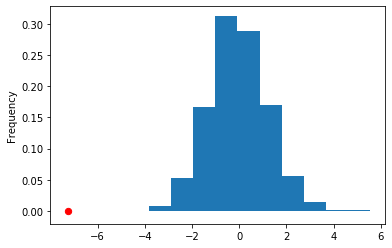

In [48]:
n_repititions = 1000
differences = []

for _ in range(n_repititions):
    shuffled_no2 = (
    no2_and_lockdown['no2']
    .sample(replace=False, frac=1)
    .reset_index(drop=True)
    )
    
    original_and_shuffled = (no2_and_lockdown.assign(**{'shuffled_no2': shuffled_no2}))
    group_means = (original_and_shuffled.groupby('lockdown').mean().loc[:, 'shuffled_no2'])
    difference = group_means.diff().iloc[-1]
    differences.append(difference)
    
pd.Series(differences).plot(kind='hist', density=True)
plt.scatter(obs_diff, 0, color='red', s=40)

In [49]:
pval = np.count_nonzero(differences<= obs_diff) / n_repititions
pval

0.0

In [50]:
gp1 = no2_and_lockdown.loc[no2_and_lockdown.lockdown==True, 'no2']
gp2 = no2_and_lockdown.loc[no2_and_lockdown.lockdown==False, 'no2']
ks_2samp(gp1, gp2)

Ks_2sampResult(statistic=0.41278518842481227, pvalue=8.324763926200237e-08)

#### Permutation Test for $CO$:

In [51]:
co_and_lockdown = dfaqi2[['co', 'lockdown']]

obs_diff = (co_and_lockdown.groupby('lockdown')['co'].mean().diff().iloc[-1])
obs_diff

-2.9493403309279103

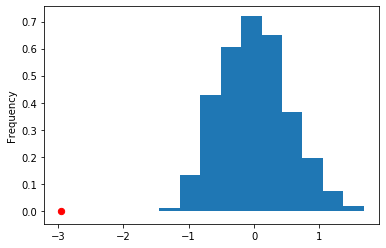

In [52]:
n_repititions = 1000
differences = []

for _ in range(n_repititions):
    shuffled_co = (
    co_and_lockdown['co']
    .sample(replace=False, frac=1)
    .reset_index(drop=True)
    )
    
    original_and_shuffled = (co_and_lockdown.assign(**{'shuffled_co': shuffled_co}))
    group_means = (original_and_shuffled.groupby('lockdown').mean().loc[:, 'shuffled_co'])
    difference = group_means.diff().iloc[-1]
    differences.append(difference)
    
pd.Series(differences).plot(kind='hist', density=True)
plt.scatter(obs_diff, 0, color='red', s=40)

In [53]:
pval = np.count_nonzero(differences<= obs_diff) / n_repititions
pval

0.0

In [54]:
gp1 = co_and_lockdown.loc[co_and_lockdown.lockdown==True, 'co']
gp2 = co_and_lockdown.loc[co_and_lockdown.lockdown==False, 'co']
ks_2samp(gp1, gp2)

print(dfaqi2019['no2'].median())

15.0


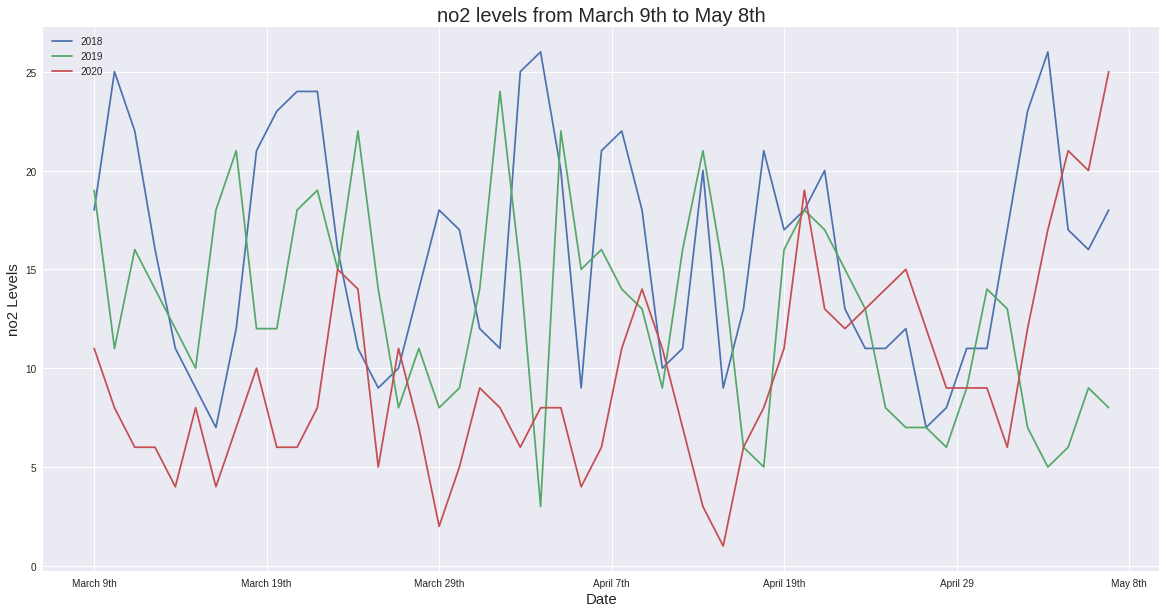

In [58]:
#create dataframe for no2 during lockdown dates
df_no2_lockdown = dfaqi.loc[:,['date', 'no2']]
df_no2_lockdown = df_no2_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]

dfaqi2018Q=df_no2_lockdown[df_no2_lockdown['date'].dt.year == 2018].sort_values(by='date').reset_index(drop=True)
dfaqi2019Q=df_no2_lockdown[df_no2_lockdown['date'].dt.year == 2019].sort_values(by='date').reset_index(drop=True)
dfaqi2020Q=df_no2_lockdown[df_no2_lockdown['date'].dt.year == 2020].sort_values(by='date').reset_index(drop=True)

#Makes plot larger
fig = plt.figure(figsize=(20,10))
#Changes style of plot
plt.style.use('seaborn')

plt.plot(dfaqi2018Q['no2'],label=2018)
plt.plot(dfaqi2019Q['no2'],label=2019)
plt.plot(dfaqi2020Q['no2'],label=2020)

plt.title("no2 levels from March 9th to May 8th", fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('no2 Levels', fontsize=15)

#Get months on x axis
plt.xticks([0,8.5,17,25.5,34,42.5,51], ["March 9th", "March 19th", "March 29th", "April 7th", "April 19th", "April 29", "May 8th"])
plt.legend()
plt.show()

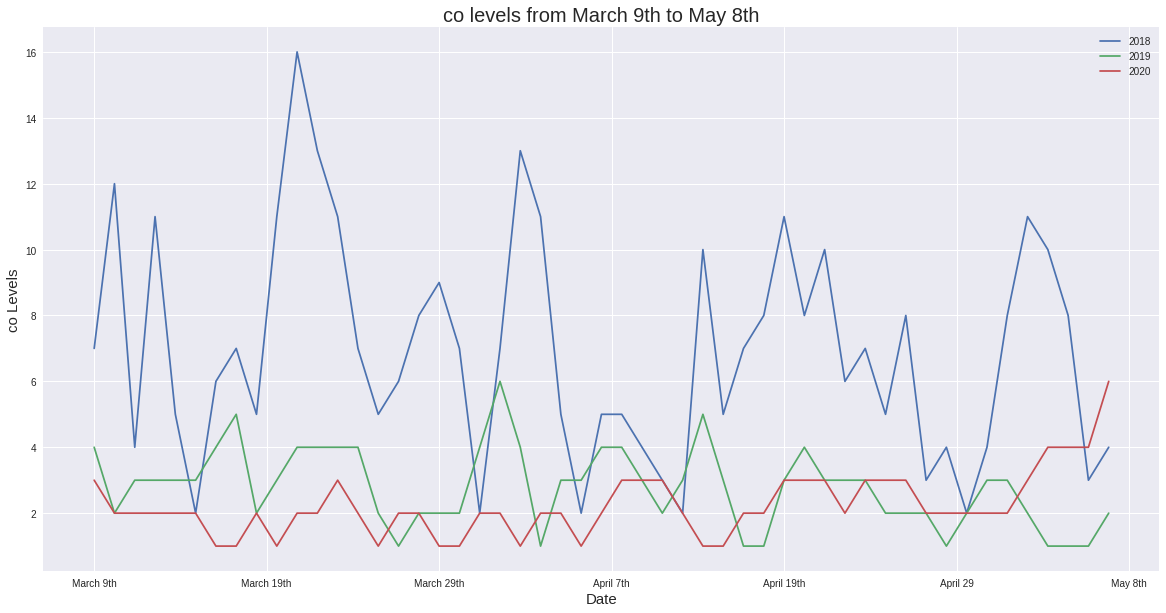

In [62]:
#create dataframe for no2 during lockdown dates
df_co_lockdown = dfaqi.loc[:,['date', 'co']]
df_co_lockdown = df_co_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]

dfaqi2018Q=df_co_lockdown[df_co_lockdown['date'].dt.year == 2018].sort_values(by='date').reset_index(drop=True)
dfaqi2019Q=df_co_lockdown[df_co_lockdown['date'].dt.year == 2019].sort_values(by='date').reset_index(drop=True)
dfaqi2020Q=df_co_lockdown[df_co_lockdown['date'].dt.year == 2020].sort_values(by='date').reset_index(drop=True)

#Makes plot larger
fig = plt.figure(figsize=(20,10))
#Changes style of plot
plt.style.use('seaborn')

plt.plot(dfaqi2018Q['co'],label=2018)
plt.plot(dfaqi2019Q['co'],label=2019)
plt.plot(dfaqi2020Q['co'],label=2020)

plt.title("co levels from March 9th to May 8th", fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('co Levels', fontsize=15)

#Get months on x axis
plt.xticks([0,8.5,17,25.5,34,42.5,51], ["March 9th", "March 19th", "March 29th", "April 7th", "April 19th", "April 29", "May 8th"])
plt.legend()
plt.show()

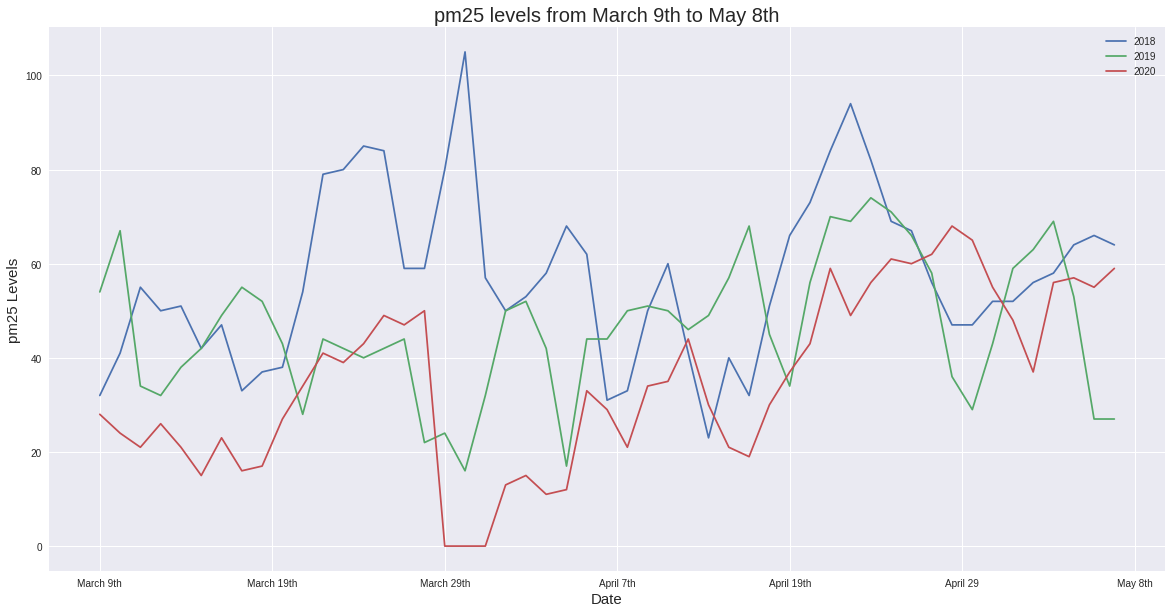

In [63]:
#create dataframe for no2 during lockdown dates
df_pm25_lockdown = dfaqi.loc[:,['date', 'pm25']]
df_pm25_lockdown = df_pm25_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]

dfaqi2018Q=df_pm25_lockdown[df_pm25_lockdown['date'].dt.year == 2018].sort_values(by='date').reset_index(drop=True)
dfaqi2019Q=df_pm25_lockdown[df_pm25_lockdown['date'].dt.year == 2019].sort_values(by='date').reset_index(drop=True)
dfaqi2020Q=df_pm25_lockdown[df_pm25_lockdown['date'].dt.year == 2020].sort_values(by='date').reset_index(drop=True)

#Makes plot larger
fig = plt.figure(figsize=(20,10))
#Changes style of plot
plt.style.use('seaborn')

plt.plot(dfaqi2018Q['pm25'],label=2018)
plt.plot(dfaqi2019Q['pm25'],label=2019)
plt.plot(dfaqi2020Q['pm25'],label=2020)

plt.title("pm25 levels from March 9th to May 8th", fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('pm25 Levels', fontsize=15)

#Get months on x axis
plt.xticks([0,8.5,17,25.5,34,42.5,51], ["March 9th", "March 19th", "March 29th", "April 7th", "April 19th", "April 29", "May 8th"])
plt.legend()
plt.show()

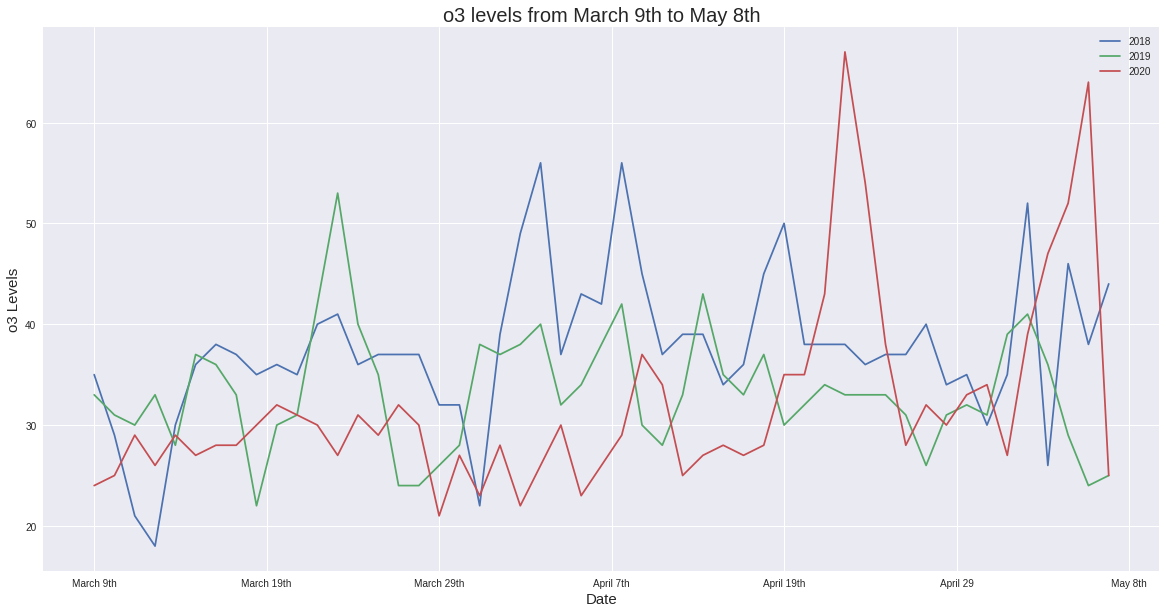

In [65]:
#create dataframe for no2 during lockdown dates
df_o3_lockdown = dfaqi.loc[:,['date', 'o3']]
df_o3_lockdown = df_o3_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]

dfaqi2018Q=df_o3_lockdown[df_o3_lockdown['date'].dt.year == 2018].sort_values(by='date').reset_index(drop=True)
dfaqi2019Q=df_o3_lockdown[df_o3_lockdown['date'].dt.year == 2019].sort_values(by='date').reset_index(drop=True)
dfaqi2020Q=df_o3_lockdown[df_o3_lockdown['date'].dt.year == 2020].sort_values(by='date').reset_index(drop=True)

#Makes plot larger
fig = plt.figure(figsize=(20,10))
#Changes style of plot
plt.style.use('seaborn')

plt.plot(dfaqi2018Q['o3'],label=2018)
plt.plot(dfaqi2019Q['o3'],label=2019)
plt.plot(dfaqi2020Q['o3'],label=2020)

plt.title("o3 levels from March 9th to May 8th", fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('o3 Levels', fontsize=15)

#Get months on x axis
plt.xticks([0,8.5,17,25.5,34,42.5,51], ["March 9th", "March 19th", "March 29th", "April 7th", "April 19th", "April 29", "May 8th"])
plt.legend()
plt.show()

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*